# Implémentation d'un modèle utilisant SMC2

Ce notebook est fait pour aller plus loin, en utilisant le modèle SMC2. Il est basé sur le module `smc_movement_models.models_SMC2`.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

c:\Users\gabri\Documents\Projets\smc_movement_models


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

import smc_movement_models.models as smc_model
import smc_movement_models.models_SMC2 as smc2_model

plt.style.use("seaborn-v0_8-paper")

np.random.seed(42)

## Chargement des données

In [4]:
summary = pd.read_csv("data/summary.csv")

In [5]:
df = pd.read_csv("data/clean_data.csv")

In [6]:
# day_str = "26/01/2008"
day_str_min = "18/01/2008"
day_str_max = "18/01/2008"
mask_day = (df["Date"] >= day_str_min) & (df["Date"] <= day_str_max)
day = df.loc[mask_day, ["Dtime", "Velocity", "Depth"]]
day["Dtime"] = pd.to_datetime(day["Dtime"])

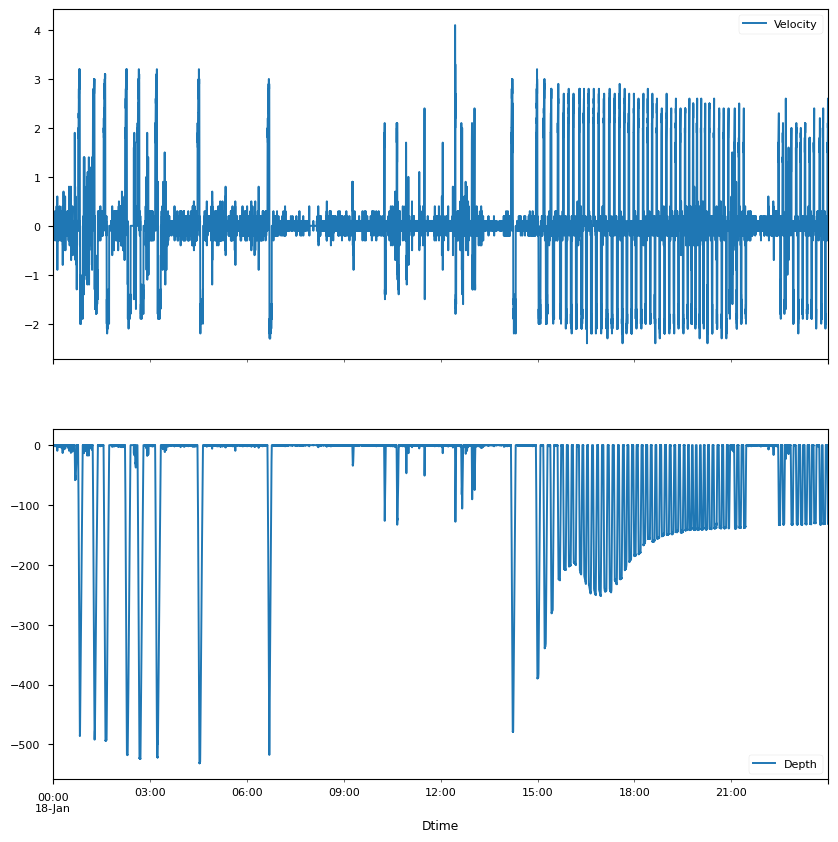

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))

day.plot(x="Dtime", y="Velocity", ax=ax1)
day.plot(x="Dtime", y="Depth", ax=ax2)
fig.savefig("day_routine.png", bbox_inches="tight")

In [8]:
# Génération des fenêtres
windows, window_times = smc_model.get_windows(day)

In [9]:
len(windows)

109

## Modèle SMC2

Dans cette section, nous lançons le modèle SMC2. Cela prends du temps (1h environ).

In [22]:
time_a1s = []
time_a2s = []
var_a1s = []
var_a2s = []
for window in tqdm(windows[58:]):
    final_a1s, final_a2s = smc2_model.estimate_a1_a2_on_window_SMC2(window, N=5)
    time_a1s.append(final_a1s)
    time_a2s.append(final_a2s)
    # var1, var2 = test_var(0.5, 0.5)
    # var_a1s.append(var1)
    # var_a2s.append(var2)
# var_a1s = np.array(var_a1s)
# var_a2s = np.array(var_a2s)
time_a1s = np.array(time_a1s)
time_a2s = np.array(time_a2s)
time_results = pd.DataFrame(
    {
        "Dtime": window_times,
        "a1s": time_a1s[:].mean(axis=1),
        "a2s": time_a2s[:].mean(axis=1),
    }
)

100%|██████████| 51/51 [36:08<00:00, 42.53s/it]


In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 15))

day.plot(x="Dtime", y="Velocity", ax=axs[2])
day.plot(x="Dtime", y="Depth", ax=axs[1])
time_results.plot(x="Dtime", y="a1s", ax=axs[0], marker="o", color="orange")
# axs[0].fill_between(np.arange(len(time_results["Dtime"])),
# time_results["a1s"] - time_results["var1"],
# time_results["a1s"]+time_results["var1"] ,alpha=0.3, facecolor="orange")
# axs[0].fill_between(time_results["Dtime"].values,
# time_results["a1s"] - time_results["var1"],
# time_results["a1s"]+time_results["var1"],
# facecolor='orange', alpha=0.2, interpolate=True)
time_results.plot(x="Dtime", y="rolling_a1s", ax=axs[0], color="orange")
time_results.plot(x="Dtime", y="a2s", ax=axs[0], marker="^", color="blue")
# axs[0].fill_between(np.arange(len(time_results["Dtime"])),
# time_results["a2s"] - time_results["var2"],
# time_results["a2s"]+time_results["var2"] ,alpha=0.3,
# facecolor="orange")
# axs[0].fill_between(time_results["Dtime"].values,
# time_results["a2s"] - time_results["var2"],
# time_results["a2s"]+time_results["var2"],
# facecolor='blue', alpha=0.2, interpolate=True)

time_results.plot(x="Dtime", y="rolling_a2s", ax=axs[0], color="blue")

fig.show()
fig.savefig("results_with_uncertainty.png", bbox_inches="tight")